# Predicting Diabetes

## Import Libraries

In [1]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support

# do ploting inline instead of in a separate window
%matplotlib inline     


## Load and Review data

In [2]:
df = pd.read_csv("C:\data\pima-data.csv")
df.shape

(768, 10)

In [3]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [5]:
df.isnull().values.any()

False

In [6]:
def plot_corr(df, size=10):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


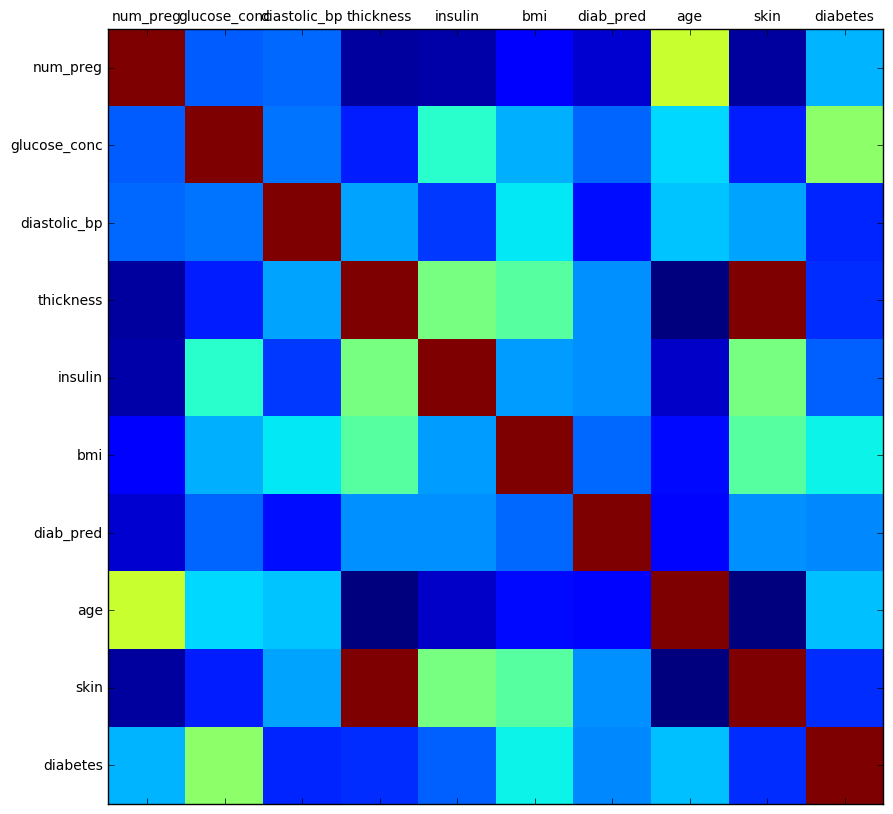

In [7]:
plot_corr(df)

In [8]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [10]:
del df['skin']

In [11]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


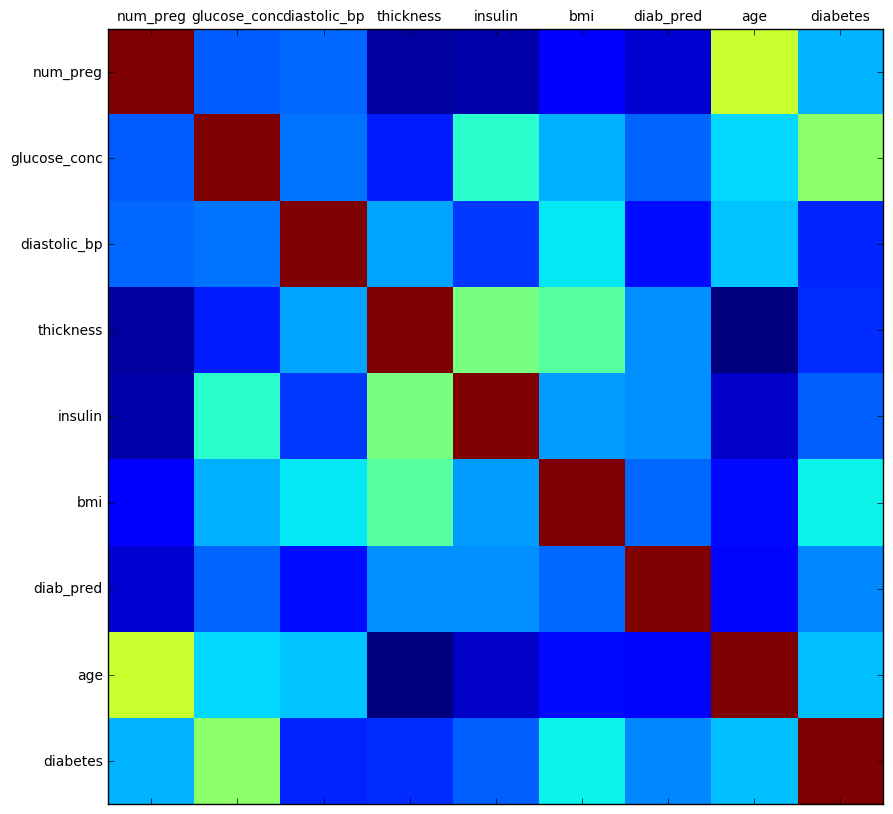

In [12]:
plot_corr(df)

## Check data types

In [13]:
diabetes_map = {True : 1, False : 0}

In [14]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [15]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


## Split the data

In [17]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_names = 'diabetes'

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_test_size,random_state=42)

In [18]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in testing set".format((len(X_test)/len(df.index))*100))

69.92% in training set
30.08% in testing set


Validate data is split correctly

In [19]:
print("Original True : {0} {1:0.2f}%".format(len(df.loc[df['diabetes']==1]),(len(df.loc[df['diabetes']==1])/len(df.index)*100)))
print("Original False : {0} {1:0.2f}%".format(len(df.loc[df['diabetes']==0]),(len(df.loc[df['diabetes']==0])/len(df.index)*100)))
print(" ")
print("Training True : {0} {1:0.2f}%".format(len(y_train[y_train[:]==1]),(len(y_train[y_train[:]==1])/len(y_train)*100)))
print("Training False : {0} {1:0.2f}%".format(len(y_train[y_train[:]==0]),(len(y_train[y_train[:]==0])/len(y_train)*100)))
print(" ")
print("Test True : {0} {1:0.2f}%".format(len(y_test[y_test[:]==1]),(len(y_test[y_test[:]==1])/len(y_test)*100)))
print("Test False : {0} {1:0.2f}%".format(len(y_test[y_test[:]==0]),(len(y_test[y_test[:]==0])/len(y_test)*100)))


Original True : 268 34.90%
Original False : 500 65.10%
 
Training True : 188 35.01%
Training False : 349 64.99%
 
Test True : 80 34.63%
Test False : 151 65.37%


How many rows have unexpected 0 values

In [20]:
print("# No. of rows in the dataframe: {0}".format((len(df))))
print("# No. of rows missing glucose_conc: {0}".format((len(df.loc[df['glucose_conc']==0]))))
print("# No. of rows missing diastolic_bp: {0}".format((len(df.loc[df['diastolic_bp']==0]))))
print("# No. of rows missing thickness: {0}".format((len(df.loc[df['thickness']==0]))))
print("# No. of rows missing insulin: {0}".format((len(df.loc[df['insulin']==0]))))
print("# No. of rows missing bmi: {0}".format((len(df.loc[df['bmi']==0]))))
print("# No. of rows missing diab_pred: {0}".format((len(df.loc[df['diab_pred']==0]))))
print("# No. of rows missing age: {0}".format((len(df.loc[df['age']==0]))))



# No. of rows in the dataframe: 768
# No. of rows missing glucose_conc: 5
# No. of rows missing diastolic_bp: 35
# No. of rows missing thickness: 227
# No. of rows missing insulin: 374
# No. of rows missing bmi: 11
# No. of rows missing diab_pred: 0
# No. of rows missing age: 0


Impute the missing values with Mean

In [21]:
from sklearn.preprocessing import Imputer
fill_0 = Imputer(missing_values=0,strategy="mean",axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [22]:
# Train and Predict using Naive-Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

Performance on Training data

In [23]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

#Accuracy
print("#Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

#Accuracy: 0.7542


Performance on Testing Data

In [24]:
nb_predict_test = nb_model.predict(X_test)

#Training Metrics
print("#Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

#Accuracy: 0.7359


Metrics

In [25]:
print("Confusion Metrics") 
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test,labels=[1,0]))) 
print("") 
print("Classification Report") 
print(metrics.classification_report(y_test,nb_predict_test,labels=[1,0]))

Confusion Metrics
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



print("Confusion Metrics")
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test,labels=[1,0])))
print("")
print("Classification Report")
print(metrics.classification_report(y_test,nb_predict_test,labels=[1,0]))

In [26]:
#Switch Algorithm to Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7,random_state = 42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

#training metrics
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print(metrics.confusion_matrix(y_test,lr_predict_test,labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test,labels=[1,0]))

Accuracy: 0.7446
[[ 44  36]
 [ 23 128]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



Setting Regularization parameter

1st max value of 0.737500 occured at C=0.300000


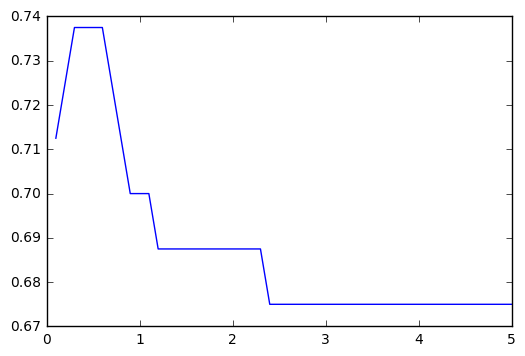

In [28]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight = "balanced", random_state=42)
    lr_model_loop.fit(X_train,y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if recall_score > best_recall_score:
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val+C_inc
    
best_score_c_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:3f} occured at C={1:3f}".format(best_recall_score,best_score_c_val))

%matplotlib inline
plt.plot(C_values,recall_scores,"-")

In [29]:
lr_model = LogisticRegression(class_weight = "balanced",C=best_score_c_val,random_state = 42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

#training metrics
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print(metrics.confusion_matrix(y_test,lr_predict_test,labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test,labels=[1,0]))

Accuracy: 0.7143
[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231



Implementing K-fold Cross Validation with Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1,random_state=42,Cs=3,cv=10,refit=True,class_weight="balanced")
lr_cv_model.fit(X_train,y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [31]:
lr_cv_predict_test = lr_cv_model.predict(X_test)
#training metrics
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test,lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test,lr_cv_predict_test,labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test,labels=[1,0]))

Accuracy: 0.6970
[[ 53  27]
 [ 43 108]]

Classification Report
             precision    recall  f1-score   support

          1       0.55      0.66      0.60        80
          0       0.80      0.72      0.76       151

avg / total       0.71      0.70      0.70       231



In [32]:
from scipy.stats.stats import pearsonr   
a = [1,4,6]
b = [1,2,3]   
print pearsonr(a,b)

SyntaxError: invalid syntax (<ipython-input-32-93b53dfe72b1>, line 4)

In [ ]:
import numpy
a = [1,4,6]
b = [1,2,3] 
print(numpy.corrcoef(a,b))